# PANDAS

Pandas é um dos principais pacotes para análise e tratamento de dados.
https://pandas.pydata.org/

In [1]:
import pandas as pd
import numpy as np

## Criando dataframes

In [3]:
arr = np.arange(36).reshape(6,6)
df = pd.DataFrame(arr,                                                                       ## dados
                  columns=['iDaDe','AltuRa','tamanhO do pe','salario','cor do olho','pesO'], ##nome das colunas
                  index=['nasser','joao','marcelo','maria','joana','raquel'], dtype=np.float16)                ## indices

df

,iDaDe,AltuRa,tamanhO do pe,salario,cor do olho,pesO
nasser,0.0,1.0,2.0,3.0,4.0,5.0
joao,6.0,7.0,8.0,9.0,10.0,11.0
marcelo,12.0,13.0,14.0,15.0,16.0,17.0
maria,18.0,19.0,20.0,21.0,22.0,23.0
joana,24.0,25.0,26.0,27.0,28.0,29.0
raquel,30.0,31.0,32.0,33.0,34.0,35.0


In [4]:
df.rename(columns=lambda s: s.lower().replace(' ', '_'), inplace=True)
display(df)

,idade,altura,tamanho_do_pe,salario,cor_do_olho,peso
nasser,0.0,1.0,2.0,3.0,4.0,5.0
joao,6.0,7.0,8.0,9.0,10.0,11.0
marcelo,12.0,13.0,14.0,15.0,16.0,17.0
maria,18.0,19.0,20.0,21.0,22.0,23.0
joana,24.0,25.0,26.0,27.0,28.0,29.0
raquel,30.0,31.0,32.0,33.0,34.0,35.0


## Série

A Série é um conjunto de dados representado por um array numpy, a direta comparação será com listas.

In [4]:
# Acessando a serie "tamanho do pe" do dataframe acima
df['tamanho_do_pe']

nasser      2.0
joao        8.0
marcelo    14.0
maria      20.0
joana      26.0
raquel     32.0
Name: tamanho_do_pe, dtype: float16

In [5]:
df['minha-serie'] = [1,2,3,np.nan,np.nan,np.nan]

In [5]:
df

,idade,altura,tamanho_do_pe,salario,cor_do_olho,peso
nasser,0.0,1.0,2.0,3.0,4.0,5.0
joao,6.0,7.0,8.0,9.0,10.0,11.0
marcelo,12.0,13.0,14.0,15.0,16.0,17.0
maria,18.0,19.0,20.0,21.0,22.0,23.0
joana,24.0,25.0,26.0,27.0,28.0,29.0
raquel,30.0,31.0,32.0,33.0,34.0,35.0


In [7]:
pd.Series([1,2,3,4,10], index=['a', 'b', 'c', 'd', 'e'], name='numeros', dtype='int8')

a     1
b     2
c     3
d     4
e    10
Name: numeros, dtype: int8

In [8]:
df['dedos_da_mao'] = [9,10,np.nan,10.0,10,10]

In [9]:
df['dedos_da_mao']

nasser      9.0
joao       10.0
marcelo     NaN
maria      10.0
joana      10.0
raquel     10.0
Name: dedos_da_mao, dtype: float64

In [10]:
df['dedos_da_mao'].maria

10.0

In [11]:
df.values

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  1.,  9.],
       [ 6.,  7.,  8.,  9., 10., 11.,  2., 10.],
       [12., 13., 14., 15., 16., 17.,  3., nan],
       [18., 19., 20., 21., 22., 23., nan, 10.],
       [24., 25., 26., 27., 28., 29., nan, 10.],
       [30., 31., 32., 33., 34., 35., nan, 10.]])

## LOC

In [6]:
df.loc[:, ['idade', 'peso']]

pandas.core.frame.DataFrame

In [57]:
df.loc[['nasser', 'maria', 'raquel'], ['idade', 'cor_do_olho']]

,idade,cor_do_olho
nasser,0.0,4.0
maria,18.0,22.0
raquel,30.0,34.0


In [58]:
df.loc[df['peso'] > 20]

,idade,altura,tamanho_do_pe,salario,cor_do_olho,peso,minha-serie,dedos_da_mao
maria,18.0,19.0,20.0,21.0,22.0,23.0,NaN,10.0
joana,24.0,25.0,26.0,27.0,28.0,29.0,NaN,10.0
raquel,30.0,31.0,32.0,33.0,34.0,35.0,NaN,10.0


In [59]:
df.loc[(df['peso'] > 20) & (df['tamanho_do_pe'] > 30)]

,idade,altura,tamanho_do_pe,salario,cor_do_olho,peso,minha-serie,dedos_da_mao
raquel,30.0,31.0,32.0,33.0,34.0,35.0,NaN,10.0


## read_html

In [17]:
df_brasil = pd.read_html('https://pt.wikipedia.org/wiki/Unidades_federativas_do_Brasil')[1]

In [18]:
df_brasil.head()

,Bandeira,Unidade federativa,Abreviação,Sede de governo,Área (km²),População (2014),Densidade (2005),PIB (2015),(% total) (2015),PIB per capita (R$) (2015),IDH (2010),Alfabetização (2016),Mortalidade infantil (2016),Expectativa de vida (2016)
0,NaN,Acre,AC,Rio Branco,"164 122,2",795 145,430,13 622 000,2,"16 953,46",663,"86,9%","17,0‰","73,9 anos"
1,NaN,Alagoas,AL,Maceió,"27 767,7",3 327 551,10861,46 364 000,8,"13 877,53",631,"80,6%","19,5‰","71,6 anos"
2,NaN,Amapá,AP,Macapá,"142 814,6",756 500,416,13 861 000,2,"18 079,54",708,95%,"23,2‰","73,9 anos"
3,NaN,Amazonas,AM,Manaus,"1 570 745,7",3 893 763,205,86 560 000,14,"21 978,95",674,"93,1%","18,2‰","71,9 anos"
4,NaN,Bahia,BA,Salvador,"564 692,7",15 150 143,2446,245 025 000,41,"16 115,89",660,87%,"17,3‰","73,5 anos"


## Dataset Wines

In [2]:
df_wines = pd.read_csv('winequality-white.csv', sep=';')
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [106]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [107]:
df_wines['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [20]:
df_wines.shape

(4898, 12)

In [21]:
df_wines.size # a qtd de valores existentes no dataframe

58776

In [22]:
type(df_wines)

pandas.core.frame.DataFrame

In [23]:
df_wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [24]:
df_wines.rename(columns=lambda s: s.lower().replace(' ', '_'), inplace=True)

In [27]:
df_wines.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [29]:
type(df_wines.ph)

pandas.core.series.Series

In [30]:
## lendo um arquivo csv com chunks

ls_quality = []
ls_alcohol = []

df_chunk = pd.read_csv('winequality-white.csv',sep=';',chunksize=100)
type(df_chunk)

pandas.io.parsers.readers.TextFileReader

In [31]:
df_wines.shape[0] / 100

48.98

In [32]:
for chunk in df_chunk:
    ls_quality.append(chunk.quality.values)
    ls_alcohol.append(chunk.alcohol.values)

In [34]:
display(ls_quality)

[array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 7, 5, 7, 6, 8, 6, 5, 8, 7,
        8, 5, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6,
        6, 7, 4, 5, 6, 5, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5,
        7, 5, 8, 5, 6, 5, 5, 6, 8, 5, 7, 7, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6,
        5, 6, 6, 5, 7, 7, 7, 6, 6, 7, 4, 6], dtype=int64),
 array([5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 4, 6, 6, 5, 5, 5, 5,
        5, 6, 6, 6, 5, 7, 7, 6, 5, 7, 5, 5, 5, 5, 6, 5, 7, 6, 5, 5, 6, 6,
        6, 6, 6, 4, 7, 6, 7, 6, 6, 5, 6, 6, 6, 7, 8, 8, 7, 5, 5, 6, 5, 5,
        6, 7, 5, 5, 6, 6, 4, 7, 5, 6, 4, 5, 4, 6, 6, 5, 5, 6, 5, 5, 6, 5,
        8, 4, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5], dtype=int64),
 array([5, 5, 5, 6, 4, 5, 5, 4, 5, 6, 5, 7, 5, 6, 7, 5, 5, 5, 5, 5, 5, 6,
        7, 6, 6, 5, 6, 6, 6, 5, 4, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 7, 6,
        5, 6, 7, 7, 7, 5, 4, 3, 5, 3, 6, 8, 7, 7, 6, 4, 6, 5, 5, 6, 6, 5,
        6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 4, 7, 8, 8, 4, 5, 5, 5, 

In [44]:
boas_qualidades = []

x = pd.read_csv('winequality-white.csv',sep=';',chunksize=100)
size = 0
for chunk in x:    
    for idx, value in enumerate(chunk['quality']):
        if value > 5:
            boas_qualidades.append(size+idx)
    size += len(chunk)

In [45]:
boas_qualidades

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 13,
 15,
 16,
 17,
 18,
 20,
 21,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 37,
 40,
 41,
 42,
 43,
 44,
 45,
 48,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 63,
 64,
 66,
 68,
 70,
 73,
 74,
 76,
 77,
 80,
 81,
 83,
 85,
 86,
 87,
 89,
 90,
 92,
 93,
 94,
 95,
 96,
 97,
 99,
 105,
 107,
 108,
 110,
 116,
 117,
 123,
 124,
 125,
 127,
 128,
 129,
 131,
 136,
 138,
 139,
 142,
 143,
 144,
 145,
 146,
 148,
 149,
 150,
 151,
 152,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 163,
 166,
 167,
 170,
 171,
 173,
 175,
 179,
 180,
 183,
 186,
 188,
 190,
 192,
 195,
 203,
 209,
 211,
 213,
 214,
 221,
 222,
 223,
 224,
 226,
 227,
 228,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 242,
 243,
 245,
 246,
 247,
 248,
 254,
 255,
 256,
 257,
 258,
 260,
 263,
 264,
 266,
 268,
 269,
 270,
 275,
 276,
 279,
 280,
 281,
 286,
 287,
 288,
 289,
 290,
 291,
 293,
 295,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 3

In [47]:
df_wines.iloc[df_wines.index.isin(boas_qualidades),:]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4891,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [55]:
df_wines.loc[df_wines['quality'] > 5].shape

(3258, 12)

In [53]:
assert df_wines.iloc[df_wines.index.isin(boas_qualidades),:].shape ==  df_wines.loc[df_wines['quality'] > 5].shape

In [60]:
df_wines.iloc[50:55, 2:6]

,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide
50,0.31,1.6,0.062,31.0
51,0.29,1.1,0.068,39.0
52,0.33,1.1,0.057,21.0
53,0.35,1.0,0.045,39.0
54,0.59,0.9,0.147,38.0


In [108]:
df_wines.iloc[df_wines.loc[df_wines['quality'] > 5].index]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4891,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [109]:
sum(df_wines['quality'] > 5)

3258

In [68]:
sum((df_wines['quality'] > 7) & (df_wines['ph'] < 3))

16

In [71]:
df_wines[(df_wines['quality'] > 7) & (df_wines['ph'] < 3)]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
1266,7.5,0.28,0.34,4.2,0.028,36.0,116.0,0.99100,2.99,0.41,12.3,8
2663,8.0,0.13,0.25,1.1,0.033,15.0,86.0,0.99044,2.98,0.39,11.2,8
3172,6.7,0.33,0.36,6.6,0.042,34.0,116.0,0.99123,2.97,0.31,12.2,8
3173,6.7,0.33,0.34,7.5,0.036,39.0,124.0,0.99123,2.99,0.32,12.4,8
3391,6.9,0.28,0.30,8.3,0.026,37.0,113.0,0.99139,2.99,0.38,12.3,8
3422,6.2,0.28,0.28,4.3,0.026,22.0,105.0,0.98900,2.98,0.64,13.1,8
3672,7.3,0.41,0.29,1.8,0.032,26.0,74.0,0.98889,2.96,0.35,13.0,8
4195,7.1,0.45,0.24,2.7,0.040,24.0,87.0,0.98862,2.94,0.38,13.4,8
4332,7.3,0.19,0.27,13.9,0.057,45.0,155.0,0.99807,2.94,0.41,8.8,8
4333,7.3,0.19,0.27,13.9,0.057,45.0,155.0,0.99807,2.94,0.41,8.8,8


## Indexing / slicing

In [14]:
df_wines[~(df_wines['quality'] == 6)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.99080,2.99,0.56,12.0,5
11,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.99470,3.14,0.53,9.7,5
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.99200,3.18,0.63,10.8,5
13,6.6,0.16,0.40,1.50,0.044,48.0,143.0,0.99120,3.54,0.52,12.4,7
14,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.7,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4887,6.2,0.41,0.22,1.90,0.023,5.0,56.0,0.98928,3.04,0.79,13.0,7
4888,6.8,0.22,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5
4892,6.5,0.23,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5
4894,6.6,0.32,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5


## to_datetime

In [86]:
new_df = pd.DataFrame([
    ['2021-11-02'],
    ['2021-03-15'],
    ['2021-05-16'],
    ])
new_df.columns = ['dt_carga']

In [76]:
new_df

,dt_carga
0,2021-11-02
1,2021-03-15
2,2021-05-16


In [77]:
pd.to_datetime(new_df['dt_carga'])

0   2021-11-02
1   2021-03-15
2   2021-05-16
Name: dt_carga, dtype: datetime64[ns]

In [89]:
new_df['dt_carga'] = pd.to_datetime(new_df['dt_carga'])

In [80]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   dt_carga  3 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 152.0 bytes


In [81]:
new_df['dt_carga'].dt.day

0     2
1    15
2    16
Name: dt_carga, dtype: int64

In [82]:
new_df['dt_carga'].dt.weekday

0    1
1    0
2    6
Name: dt_carga, dtype: int64

In [83]:
new_df['dt_carga'].dt.month

0    11
1     3
2     5
Name: dt_carga, dtype: int64

In [84]:
new_df['dt_carga'].dt.year

0    2021
1    2021
2    2021
Name: dt_carga, dtype: int64

In [93]:
new_df['dt_carga'] = new_df['dt_carga'].dt.strftime('%d/%m/%Y')

In [94]:
new_df['dt_carga']

0    02/11/2021
1    15/03/2021
2    16/05/2021
Name: dt_carga, dtype: object

In [101]:
pd.to_datetime(new_df['dt_carga'], format='%d/%m/%Y')

0   2021-11-02
1   2021-03-15
2   2021-05-16
Name: dt_carga, dtype: datetime64[ns]

## Describe

In [110]:
df_wines.describe(percentiles=[0.25, 0.5, 0.75, 0.95])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
95%,8.300000,0.460000,0.540000,15.700000,0.067000,63.000000,212.000000,0.999000,3.460000,0.710000,12.700000,7.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [18]:
df_wines['quality'].value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

In [20]:
df_wines.describe(exclude='float64')

,quality
count,4898.000000
mean,5.877909
std,0.885639
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


In [21]:
# com dados categóricos

arr = [['a',1,2],['a',2,2],['c',2,3]]
pd.DataFrame(arr,columns=['nome','idade','peso']).describe(include='object')

,nome
count,3
unique,2
top,a
freq,2


In [23]:
df_wines.quantile(0.25)

fixed acidity             6.300000
volatile acidity          0.210000
citric acid               0.270000
residual sugar            1.700000
chlorides                 0.036000
free sulfur dioxide      23.000000
total sulfur dioxide    108.000000
density                   0.991723
pH                        3.090000
sulphates                 0.410000
alcohol                   9.500000
quality                   5.000000
Name: 0.25, dtype: float64

In [30]:
df_wines['pH'].var() # variância

0.02280118108410971

In [31]:
df_wines['pH'].std() # desvio padrão

0.1510005996150668

In [32]:
df_wines['pH'].mean() # média

3.1882666394446715

In [33]:
df_wines['pH'].min()

2.72

In [34]:
df_wines['pH'].max()

3.82

## Correlação

In [35]:
df_wines.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [36]:
def minha_corr(conj1, conj2):
    return conj1.mean() - conj2.mean()

In [37]:
df_wines.corr(method=minha_corr) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,6.576547,6.520596,0.463373,6.809015,-28.453297,-131.505870,5.860760,3.666521,6.364941,-3.659479,0.976878
volatile acidity,6.576547,1.000000,-0.055950,-6.113174,0.232469,-35.029844,-138.082416,-0.715786,-2.910026,-0.211606,-10.236026,-5.599668
citric acid,6.520596,-0.055950,1.000000,-6.057223,0.288419,-34.973893,-138.026466,-0.659836,-2.854075,-0.155655,-10.180076,-5.543718
residual sugar,0.463373,-6.113174,-6.057223,1.000000,6.345643,-28.916670,-131.969243,5.397387,3.203148,5.901568,-4.122852,0.513506
chlorides,6.809015,0.232469,0.288419,6.345643,1.000000,-35.262313,-138.314885,-0.948255,-3.142494,-0.444075,-10.468495,-5.832137
free sulfur dioxide,-28.453297,-35.029844,-34.973893,-28.916670,-35.262313,1.000000,-103.052572,34.314058,32.119818,34.818238,24.793818,29.430176
total sulfur dioxide,-131.505870,-138.082416,-138.026466,-131.969243,-138.314885,-103.052572,1.000000,137.366630,135.172391,137.870811,127.846390,132.482748
density,5.860760,-0.715786,-0.659836,5.397387,-0.948255,34.314058,137.366630,1.000000,-2.194239,0.504181,-9.520240,-4.883882
pH,3.666521,-2.910026,-2.854075,3.203148,-3.142494,32.119818,135.172391,-2.194239,1.000000,2.698420,-7.326000,-2.689643
sulphates,6.364941,-0.211606,-0.155655,5.901568,-0.444075,34.818238,137.870811,0.504181,2.698420,1.000000,-10.024420,-5.388062


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

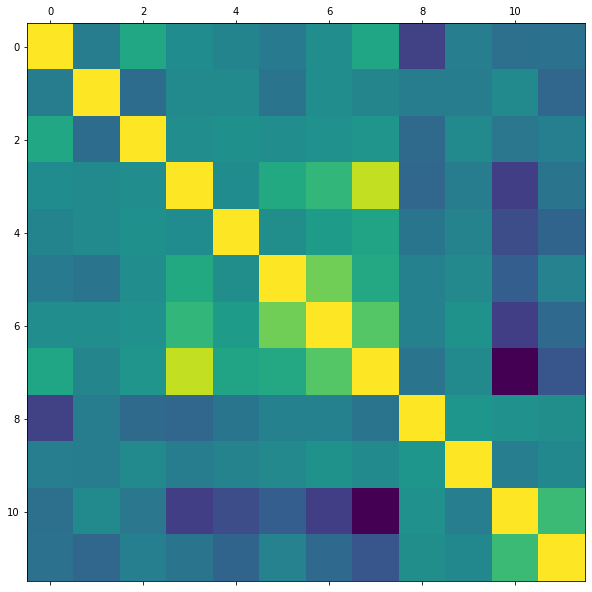

In [66]:
plt.figure(figsize=(10,10))
plt.matshow(df_wines.corr(), fignum=1)
plt.show()

In [111]:
df_wines.mode() # moda = valor mais frequente

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.28,0.3,1.2,0.044,29.0,111.0,0.992,3.14,0.5,9.4,6


In [52]:
df_wines['quality'].dtype

dtype('int64')

In [53]:
# transforma o tipo de dado da série
df_wines['quality'].astype('int')

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int32

In [54]:
df_wines['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [55]:
df_wines['quality'].nunique()

7

In [57]:
df_wines['pH'].value_counts()

3.14    172
3.16    164
3.22    146
3.19    145
3.18    138
       ... 
2.74      1
2.72      1
3.82      1
3.62      1
3.67      1
Name: pH, Length: 103, dtype: int64

In [76]:
df_wines['quality'].value_counts(normalize=True, sort=True)

6    0.448755
5    0.297468
7    0.179665
8    0.035729
4    0.033279
3    0.004083
9    0.001021
Name: quality, dtype: float64

In [112]:
# a segunda nota que menos aparece
df_wines['quality'].value_counts(normalize=True, sort=True).index[-2]

3

## Aplicando condições

In [6]:
precos_patterns = [
    (df_wines['quality'] < 5, df_wines['alcohol']*0.9),
    (df_wines['quality'] > 5, df_wines['alcohol']*1.5),
    (df_wines['quality'] == 5, df_wines['alcohol']*1.1),
]

preco_criteria, preco_values = zip(*precos_patterns)
df_wines['novos_precos'] = np.select(preco_criteria, preco_values, df_wines['alcohol'])

In [3]:
qualidade_patterns = [
    (df_wines['quality'] < 5, 'baixa_qualidade'),
    (df_wines['quality'] > 5, 'alta_qualidade'),
    (df_wines['quality'] == 5, 'media_qualidade'),
]
qualidade_criteria, qualidade_values = zip(*qualidade_patterns)
df_wines['categoria_qualidade'] = np.select(qualidade_criteria, qualidade_values, 'indefinida')

In [127]:
df_wines[df_wines['quality'] < 5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,novos_precos,categoria_qualidade
46,6.2,0.450,0.26,4.40,0.063,63.0,206.0,0.99400,3.27,0.52,9.8,4,8.82,baixa_qualidade
98,9.8,0.360,0.46,10.50,0.038,4.0,83.0,0.99560,2.89,0.30,10.1,4,9.09,baixa_qualidade
115,5.5,0.485,0.00,1.50,0.065,8.0,103.0,0.99400,3.63,0.40,9.7,4,8.73,baixa_qualidade
147,6.4,0.595,0.14,5.20,0.058,15.0,97.0,0.99510,3.38,0.36,9.0,4,8.10,baixa_qualidade
172,7.6,0.480,0.37,0.80,0.037,4.0,100.0,0.99020,3.03,0.39,11.4,4,10.26,baixa_qualidade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,7.1,0.240,0.34,1.20,0.045,6.0,132.0,0.99132,3.16,0.46,11.2,4,10.08,baixa_qualidade
4779,6.0,0.590,0.00,0.80,0.037,30.0,95.0,0.99032,3.10,0.40,10.9,4,9.81,baixa_qualidade
4804,6.0,0.350,0.46,0.90,0.033,9.0,65.0,0.98934,3.24,0.35,12.1,4,10.89,baixa_qualidade
4839,5.2,0.405,0.15,1.45,0.038,10.0,44.0,0.99125,3.52,0.40,11.6,4,10.44,baixa_qualidade


## Apply

In [129]:
def normalizar_max(value, maximo):
    return (value/maximo)

lista_de_colunas = ['total sulfur dioxide', 'free sulfur dioxide']

for coluna in lista_de_colunas:
    
    valor_maximo = df_wines[coluna].max()    
    df_wines[coluna] = df_wines[coluna].apply(normalizar_max, args=(valor_maximo,))

In [130]:
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,novos_precos,categoria_qualidade
0,7.0,0.27,0.36,20.7,0.045,0.155709,0.386364,1.0010,3.00,0.45,8.8,6,13.20,alta_qualidade
1,6.3,0.30,0.34,1.6,0.049,0.048443,0.300000,0.9940,3.30,0.49,9.5,6,14.25,alta_qualidade
2,8.1,0.28,0.40,6.9,0.050,0.103806,0.220455,0.9951,3.26,0.44,10.1,6,15.15,alta_qualidade
3,7.2,0.23,0.32,8.5,0.058,0.162630,0.422727,0.9956,3.19,0.40,9.9,6,14.85,alta_qualidade
4,7.2,0.23,0.32,8.5,0.058,0.162630,0.422727,0.9956,3.19,0.40,9.9,6,14.85,alta_qualidade


In [131]:
df_wines['categoria_qualidade'].value_counts()

alta_qualidade     3258
media_qualidade    1457
baixa_qualidade     183
Name: categoria_qualidade, dtype: int64

In [132]:
def calc_novo_alcohol(valor, qualidade):
    if qualidade == 'baixa_qualidade':
        return valor*0.9
    elif qualidade == 'media_qualidade':
        return valor*1.1
    else: 
        return valor*1.5

df_wines['alcohol'].apply(calc_novo_alcohol, args=('baixa_qualidade',))

0        7.92
1        8.55
2        9.09
3        8.91
4        8.91
        ...  
4893    10.08
4894     8.64
4895     8.46
4896    11.52
4897    10.62
Name: alcohol, Length: 4898, dtype: float64

In [138]:
type(df_wines.loc[:, ['alcohol','categoria_qualidade']])

pandas.core.frame.DataFrame

In [8]:
df_wines['ph_cat'] = df_wines['pH'].apply(lambda x: 'alto' if x > 3 else 'baixo')

In [11]:
df_wines['pH'].mean()

3.1882666394446715

In [9]:
pd.pivot_table(index='quality', columns='ph_cat', values='pH', aggfunc='mean', data=df_wines)

ph_cat,alto,baixo
quality,,
3,3.260000,2.897500
4,3.213542,2.950526
5,3.195027,2.943947
6,3.216665,2.946096
7,3.243739,2.955165
8,3.246519,2.960000
9,3.308000,NaN


In [15]:
# média de PH de cada densidade por qualidade
pd.pivot_table(index='density', columns='quality', values='pH', aggfunc='mean', data=df_wines)

quality,3,4,5,6,7,8,9
density,,,,,,,
0.98711,NaN,NaN,NaN,NaN,3.10,NaN,NaN
0.98713,NaN,NaN,NaN,NaN,NaN,3.33,NaN
0.98722,NaN,NaN,3.30,NaN,NaN,NaN,NaN
0.98740,NaN,NaN,3.26,NaN,NaN,NaN,NaN
0.98742,NaN,NaN,NaN,NaN,3.31,NaN,NaN
...,...,...,...,...,...,...,...
1.00240,NaN,NaN,2.98,NaN,NaN,NaN,NaN
1.00241,NaN,NaN,3.44,NaN,NaN,NaN,NaN
1.00295,NaN,NaN,NaN,3.06,NaN,NaN,NaN


In [17]:
df_wines.sort_values(['quality', 'alcohol'], ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,categoria_qualidade,novos_precos,ph_cat
1605,7.1,0.260,0.49,2.20,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,alta_qualidade,19.35,alto
876,6.9,0.360,0.34,4.20,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,alta_qualidade,19.05,alto
827,7.4,0.240,0.36,2.00,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,alta_qualidade,18.75,alto
820,6.6,0.360,0.29,1.60,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,alta_qualidade,18.60,alto
774,9.1,0.270,0.45,10.60,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,alta_qualidade,15.60,alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,6.7,0.250,0.26,1.55,0.041,118.5,216.0,0.99490,3.55,0.63,9.4,3,baixa_qualidade,8.46,alto
1034,7.9,0.640,0.46,10.60,0.244,33.0,227.0,0.99830,2.87,0.74,9.1,3,baixa_qualidade,8.19,baixo
1484,7.5,0.320,0.24,4.60,0.053,8.0,134.0,0.99580,3.14,0.50,9.1,3,baixa_qualidade,8.19,alto
294,9.1,0.590,0.38,1.60,0.066,34.0,182.0,0.99680,3.23,0.38,8.5,3,baixa_qualidade,7.65,alto


## sort_values, sort_index

In [18]:
df_wines['alcohol'].sort_values(ascending=False)

3918    14.20
4503    14.05
3904    14.00
3150    14.00
1099    14.00
        ...  
3835     8.40
3839     8.40
4020     8.40
3265     8.00
2625     8.00
Name: alcohol, Length: 4898, dtype: float64

In [24]:
df_wines.loc[(df_wines['pH'] > 3) & (df_wines['pH'] < 3.2)].sort_values(by='fixed acidity', ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,categoria_qualidade,novos_precos,ph_cat
1526,14.2,0.270,0.49,1.10,0.037,33.0,156.0,0.99200,3.15,0.54,11.1,6,alta_qualidade,16.65,alto
1239,10.3,0.250,0.48,2.20,0.042,28.0,164.0,0.99800,3.19,0.59,9.7,5,media_qualidade,10.67,alto
1856,10.0,0.910,0.42,1.60,0.056,34.0,181.0,0.99680,3.11,0.46,10.0,4,baixa_qualidade,9.00,alto
1951,9.9,1.005,0.46,1.40,0.046,34.0,185.0,0.99660,3.02,0.49,10.2,4,baixa_qualidade,9.18,alto
2404,9.8,0.160,0.46,1.80,0.046,23.0,130.0,0.99587,3.04,0.67,9.6,5,media_qualidade,10.56,alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,5.2,0.285,0.29,5.15,0.035,64.0,138.0,0.98950,3.19,0.34,12.4,8,alta_qualidade,18.60,alto
3333,5.1,0.165,0.22,5.70,0.047,42.0,146.0,0.99340,3.18,0.55,9.9,6,alta_qualidade,14.85,alto
4881,5.0,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6,alta_qualidade,14.10,alto
4603,5.0,0.330,0.18,4.60,0.032,40.0,124.0,0.99114,3.18,0.40,11.0,6,alta_qualidade,16.50,alto


In [21]:
df_wines['quality'].value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

<AxesSubplot:ylabel='Frequency'>

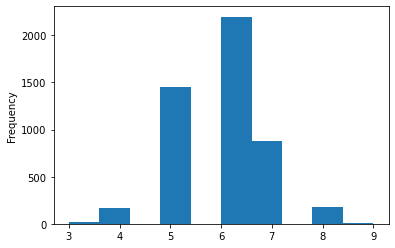

In [22]:
df_wines['quality'].plot(kind='hist')

## nlargest, nsmallest

In [25]:
df_wines['density'].nlargest(15)

2781    1.03898
1653    1.01030
1663    1.01030
3619    1.00295
3623    1.00295
2334    1.00241
1608    1.00240
3420    1.00196
2250    1.00182
1958    1.00170
1963    1.00170
1454    1.00120
2419    1.00118
1973    1.00110
1974    1.00110
Name: density, dtype: float64

In [27]:
df_wines['density'].nsmallest(15).index

Int64Index([4149, 2945, 3710, 3773, 3673, 3676, 3904, 3915, 4789, 4645, 3918,
            3367, 3370, 2998, 1603],
           dtype='int64')

In [28]:
df_wines.nlargest(10, columns='density')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,categoria_qualidade,novos_precos,ph_cat
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,alta_qualidade,17.55,alto
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,alta_qualidade,13.20,alto
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,alta_qualidade,13.20,alto
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6,alta_qualidade,15.90,alto
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6,alta_qualidade,15.90,alto
2334,7.5,0.230,0.35,17.80,0.058,128.0,212.0,1.00241,3.44,0.43,8.9,5,media_qualidade,9.79,alto
1608,6.9,0.270,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5,media_qualidade,9.46,baixo
3420,7.6,0.280,0.49,20.15,0.060,30.0,145.0,1.00196,3.01,0.44,8.5,5,media_qualidade,9.35,alto
2250,9.2,0.340,0.54,17.30,0.060,46.0,235.0,1.00182,3.08,0.61,8.8,6,alta_qualidade,13.20,alto
1958,7.4,0.320,0.55,16.60,0.056,53.0,238.0,1.00170,2.96,0.58,8.7,6,alta_qualidade,13.05,baixo


In [29]:
df_wines.nsmallest(10, columns='density')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,categoria_qualidade,novos_precos,ph_cat
4149,5.8,0.240,0.28,1.4,0.038,40.0,76.0,0.98711,3.10,0.29,13.90,7,alta_qualidade,20.850,alto
2945,4.9,0.330,0.31,1.2,0.016,39.0,150.0,0.98713,3.33,0.59,14.00,8,alta_qualidade,21.000,alto
3710,4.7,0.670,0.09,1.0,0.020,5.0,9.0,0.98722,3.30,0.34,13.60,5,media_qualidade,14.960,alto
3773,5.0,0.610,0.12,1.3,0.009,65.0,100.0,0.98740,3.26,0.37,13.50,5,media_qualidade,14.850,alto
3673,5.4,0.300,0.30,1.2,0.029,25.0,93.0,0.98742,3.31,0.40,13.60,7,alta_qualidade,20.400,alto
3676,5.3,0.300,0.30,1.2,0.029,25.0,93.0,0.98742,3.31,0.40,13.60,7,alta_qualidade,20.400,alto
3904,5.0,0.455,0.18,1.9,0.036,33.0,106.0,0.98746,3.21,0.83,14.00,7,alta_qualidade,21.000,alto
3915,4.7,0.455,0.18,1.9,0.036,33.0,106.0,0.98746,3.21,0.83,14.00,7,alta_qualidade,21.000,alto
4789,5.5,0.620,0.33,1.7,0.037,24.0,118.0,0.98758,3.15,0.39,13.55,6,alta_qualidade,20.325,alto
4645,5.0,0.240,0.34,1.1,0.034,49.0,158.0,0.98774,3.32,0.32,13.10,7,alta_qualidade,19.650,alto


## reset_index, set_index

In [33]:
x = df_wines.loc[(df_wines['pH'] > 3) & (df_wines['pH'] < 3.2)].sort_values(by='fixed acidity', ascending=False).reset_index(drop=True)

In [34]:
x.sort_index(axis=1) # ordenou as colunas por ordem alfabética

,alcohol,categoria_qualidade,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,novos_precos,pH,ph_cat,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
0,11.1,alta_qualidade,0.037,0.49,0.99200,14.2,33.0,16.65,3.15,alto,6,1.10,0.54,156.0,0.270
1,9.7,media_qualidade,0.042,0.48,0.99800,10.3,28.0,10.67,3.19,alto,5,2.20,0.59,164.0,0.250
2,10.0,baixa_qualidade,0.056,0.42,0.99680,10.0,34.0,9.00,3.11,alto,4,1.60,0.46,181.0,0.910
3,10.2,baixa_qualidade,0.046,0.46,0.99660,9.9,34.0,9.18,3.02,alto,4,1.40,0.49,185.0,1.005
4,9.6,media_qualidade,0.046,0.46,0.99587,9.8,23.0,10.56,3.04,alto,5,1.80,0.67,130.0,0.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,12.4,alta_qualidade,0.035,0.29,0.98950,5.2,64.0,18.60,3.19,alto,8,5.15,0.34,138.0,0.285
2190,9.9,alta_qualidade,0.047,0.22,0.99340,5.1,42.0,14.85,3.18,alto,6,5.70,0.55,146.0,0.165
2191,9.4,alta_qualidade,0.030,0.27,0.99540,5.0,34.0,14.10,3.07,alto,6,11.75,0.50,118.0,0.235
2192,11.0,alta_qualidade,0.032,0.18,0.99114,5.0,40.0,16.50,3.18,alto,6,4.60,0.40,124.0,0.330


In [36]:
x.sort_index(axis=0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,categoria_qualidade,novos_precos,ph_cat
0,14.2,0.270,0.49,1.10,0.037,33.0,156.0,0.99200,3.15,0.54,11.1,6,alta_qualidade,16.65,alto
1,10.3,0.250,0.48,2.20,0.042,28.0,164.0,0.99800,3.19,0.59,9.7,5,media_qualidade,10.67,alto
2,10.0,0.910,0.42,1.60,0.056,34.0,181.0,0.99680,3.11,0.46,10.0,4,baixa_qualidade,9.00,alto
3,9.9,1.005,0.46,1.40,0.046,34.0,185.0,0.99660,3.02,0.49,10.2,4,baixa_qualidade,9.18,alto
4,9.8,0.160,0.46,1.80,0.046,23.0,130.0,0.99587,3.04,0.67,9.6,5,media_qualidade,10.56,alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,5.2,0.285,0.29,5.15,0.035,64.0,138.0,0.98950,3.19,0.34,12.4,8,alta_qualidade,18.60,alto
2190,5.1,0.165,0.22,5.70,0.047,42.0,146.0,0.99340,3.18,0.55,9.9,6,alta_qualidade,14.85,alto
2191,5.0,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6,alta_qualidade,14.10,alto
2192,5.0,0.330,0.18,4.60,0.032,40.0,124.0,0.99114,3.18,0.40,11.0,6,alta_qualidade,16.50,alto


## concat

In [37]:
serie1 = pd.Series(['a','b','c','d','e','f',])
serie2 = pd.Series(['g','h','i','j','k','l',])

In [40]:
pd.concat([serie1, serie2], ignore_index=True)

0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
11    l
dtype: object

In [ ]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#cria uma lista de dataframes lendo de todos os arquivos e concatena em um único
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#exporta pra csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

## merge, join

In [43]:
df = pd.DataFrame({'numbers': [1, 2, 3], 'colors': ['red', 'white', 'blue']}, 
                  columns=['numbers', 'colors'])
display(df)

,numbers,colors
0,1,red
1,2,white
2,3,blue


In [51]:
df2 = pd.DataFrame({'numbers': [3, 4, 5], 'colors': ['red', 'blue', 'black']}, 
                  columns=['numbers', 'colors'])
display(df2)

,numbers,colors
0,3,red
1,4,blue
2,5,black


In [52]:
df.merge(df2, on='numbers')

,numbers,colors_x,colors_y
0,3,blue,red


In [53]:
df.merge(df2, on='numbers', how='left')

,numbers,colors_x,colors_y
0,1,red,NaN
1,2,white,NaN
2,3,blue,red


In [54]:
df.merge(df2, on='numbers', how='right')

,numbers,colors_x,colors_y
0,3,blue,red
1,4,NaN,blue
2,5,NaN,black


In [55]:
df.merge(df2, on='numbers', how='outer')

,numbers,colors_x,colors_y
0,1,red,NaN
1,2,white,NaN
2,3,blue,red
3,4,NaN,blue
4,5,NaN,black


In [56]:
df.merge(df2, on='colors', suffixes=('_1', '_2'))

,numbers_1,colors,numbers_2
0,1,red,3
1,3,blue,4


## isna / isnull

In [58]:
df_wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
categoria_qualidade     0
novos_precos            0
ph_cat                  0
dtype: int64

In [85]:
df_wines.iloc[df_wines.sample(10).index, [0,3,4,5]] = np.nan

In [86]:
# trazer as linhas que possuem pelo menos 1 coluna com valor nulo
df_wines[df_wines.isna().sum(axis=1) > 0]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,categoria_qualidade,novos_precos,ph_cat
670,NaN,0.42,0.26,NaN,NaN,NaN,199.0,0.99720,3.14,0.55,9.300000,6,alta_qualidade,13.95,alto
1007,NaN,0.52,0.06,NaN,NaN,NaN,79.0,0.99320,3.32,0.43,9.300000,5,media_qualidade,10.23,alto
1224,NaN,0.23,0.39,NaN,NaN,NaN,102.0,0.99080,3.26,0.54,12.300000,7,alta_qualidade,18.45,alto
2055,NaN,0.29,0.29,NaN,NaN,NaN,155.0,0.99310,3.07,0.26,10.600000,6,alta_qualidade,15.90,alto
2092,NaN,0.76,0.03,NaN,NaN,NaN,93.0,0.99320,3.34,0.38,9.200000,5,media_qualidade,10.12,alto
2922,NaN,0.44,0.47,NaN,NaN,NaN,137.0,0.98984,3.13,0.32,13.000000,8,alta_qualidade,19.50,alto
2992,NaN,0.20,0.27,NaN,NaN,NaN,130.0,0.99496,3.11,0.44,10.500000,7,alta_qualidade,15.75,alto
4341,NaN,0.27,0.52,NaN,NaN,NaN,139.0,0.99788,3.04,0.62,10.033333,6,alta_qualidade,15.05,alto
4354,NaN,0.31,0.27,NaN,NaN,NaN,169.0,0.99323,3.27,0.45,11.100000,6,alta_qualidade,16.65,alto
4373,NaN,0.26,0.28,NaN,NaN,NaN,98.0,0.98918,3.14,0.44,12.500000,6,alta_qualidade,18.75,alto


In [63]:
df_wines.notna().sum()

fixed acidity           4888
volatile acidity        4898
citric acid             4898
residual sugar          4888
chlorides               4888
free sulfur dioxide     4888
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
categoria_qualidade     4898
novos_precos            4898
ph_cat                  4898
dtype: int64

## fillna, replace

In [71]:
df_wines.isnull().sum()

fixed acidity           10
volatile acidity         0
citric acid              0
residual sugar          10
chlorides               10
free sulfur dioxide     10
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
categoria_qualidade      0
novos_precos             0
ph_cat                   0
dtype: int64

In [84]:
# df_wines.isin(df_wines.isna().index)
df_wines.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
categoria_qualidade     0
novos_precos            0
ph_cat                  0
dtype: int64

In [90]:
# para esse exemplo como substiuiremos os valores faltantes pela média deveremos considerar apenas as colunas
# do tipo numerico

for coluna in df_wines.select_dtypes('number').columns:

    media = df_wines[coluna].mean()
    df_wines[coluna].fillna(value=media, inplace=True)

In [91]:
df_wines.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
categoria_qualidade     0
novos_precos            0
ph_cat                  0
dtype: int64